<a href="https://colab.research.google.com/github/eschmidt39/Homework7_Schmidt/blob/main/Homework7_Schmidt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

use binary classification of Iris dataset to train a logistic regression model with 70% training and 30% test sets

In [2]:
#load dataset
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X, y
#0 = setosa, 1 and 2 = another species

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [3]:
type(y)

numpy.ndarray

In [4]:
#set all species that are not setosa (0) as non-setosa (1)
y[y != 0] = 1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
#set train and test sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

In [6]:
logreg = LogisticRegression()

#train model
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

generate a confusion matrix and calculate accuracy, precision, recall and F1 score

In [7]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

#row is actual; 0 is when the actual is 0 (setosa), 1 is when actual is 1 (non)
#column is predicted; 0 predicted as 0 (setosa), 1 predicted 1 (non)

array([[16,  0],
       [ 0, 29]])

In [8]:
TP = 16
TN = 29
FP = 0
FN = 0

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2*(precision * recall)/(precision + recall)

print('Accuracy:', accuracy)
print('Precision:', precision)
print("Recall:", recall)
print("F1 Score:", F1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


plot ROC curve and compute AUC

In [9]:
#train SVM classifier
model = SVC(kernel = 'linear', C=10, probability=True)
model.fit(X_train, y_train)

#predict probabilities
y_proba = model.predict_proba(X_test)[:,1]

In [10]:
#compute ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

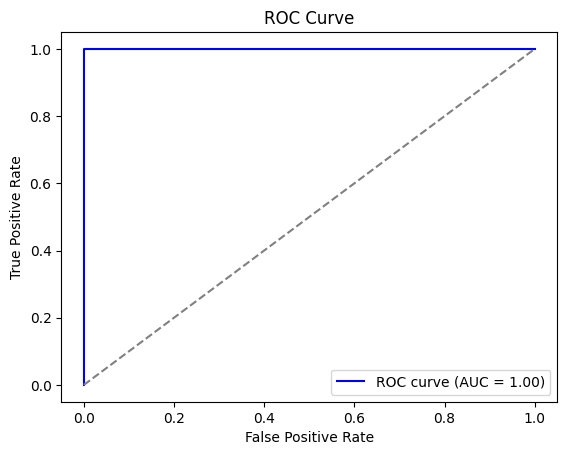

In [11]:
#ROC curve and AUC
fig, ax = plt.subplots()

ax.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
ax.plot([0,1], [0,1], linestyle="--", color='gray')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

plt.show()

import wine dataset and split into .75 training and .25 testing

In [12]:
#load dataset
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
X, y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [13]:
#set train and test sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

train using kernel linear

In [14]:
#train and test model
clf_lin = SVC(kernel='linear')
clf_lin.fit(X_train, y_train)

y_pred_lin = clf_lin.predict(X_test)

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lin)
confusion_matrix

array([[16,  0,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

finding TP, TN, FP, FN with 3 variables

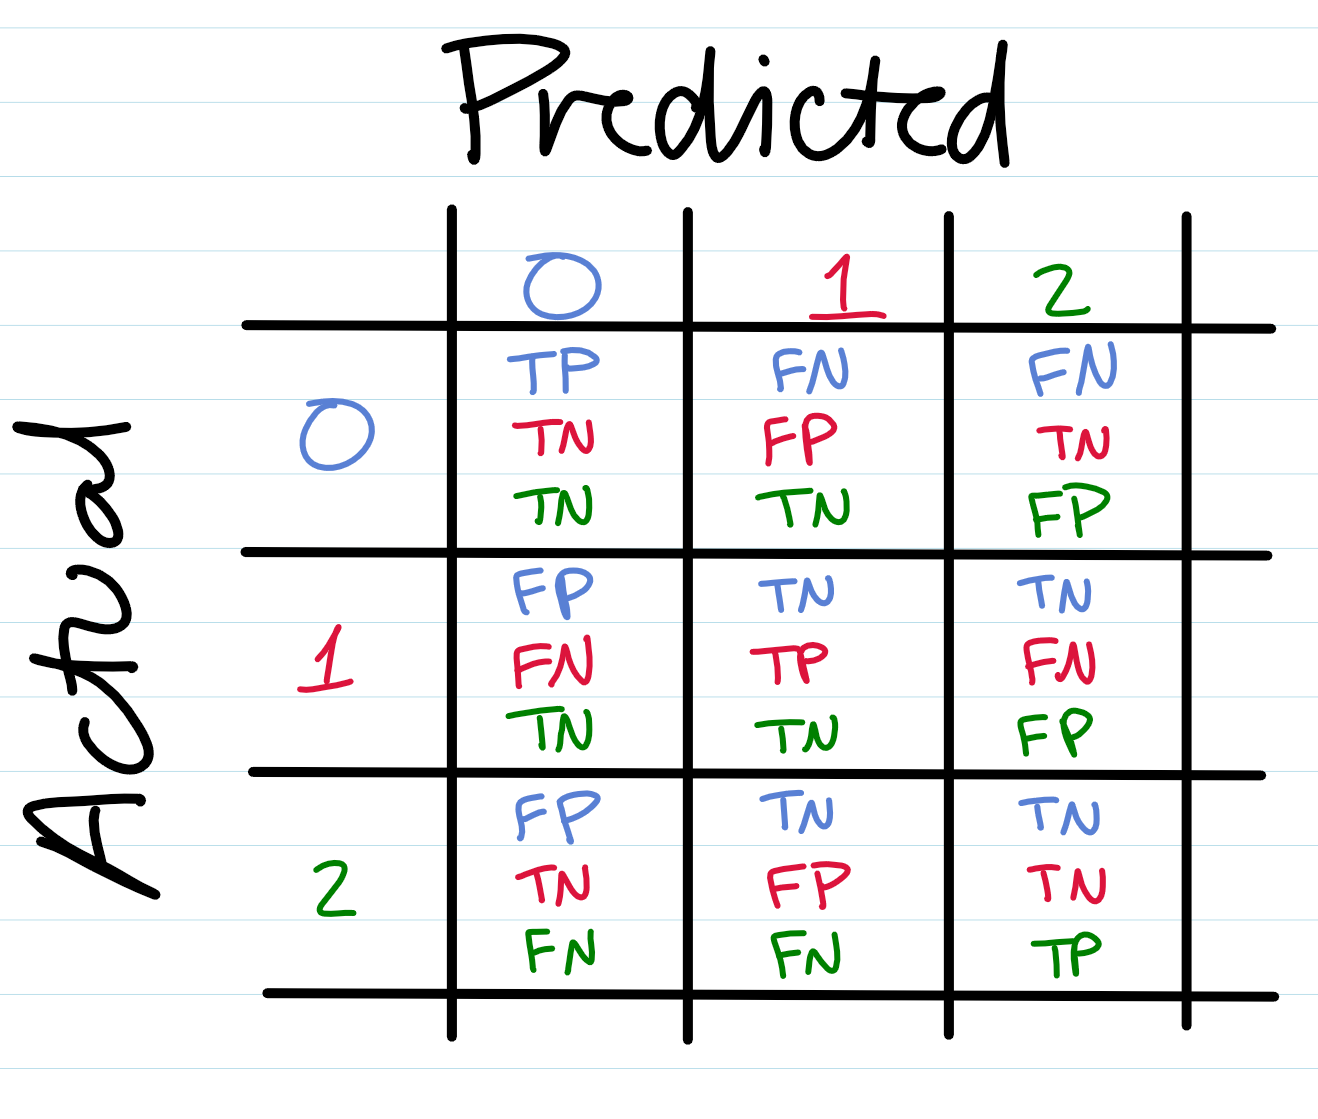

photo used to determine TP, TN, FP, and FN for multiple variables

TP = TP1 + TP2 + TP3
TN = TN1 + TN2 + TN3
FP = FP1 + FP2 + FP3
FN = FN1 + FN2 + FN3

In [16]:
TP_lin = 16 + 20 + 8
TN_lin = (20 + 1 + 0 + 8) + (16 + 0 + 0 + 8) + (16 + 0 + 0 + 20)
FP_lin = (0 + 0) + (0 + 0) + (0 + 1)
FN_lin = (0 + 0) + (0 + 1) + (0 + 0)

In [17]:
accuracy_lin = (TP_lin + TN_lin) / (TP_lin + TN_lin + FP_lin + FN_lin)
precision_lin = TP_lin / (TP_lin + FP_lin)
recall_lin = TP_lin / (TP_lin + FN_lin)
F1_lin = 2*(precision_lin * recall_lin)/(precision_lin + recall_lin)

print('Accuracy:', accuracy_lin)
print('Precision:', precision_lin)
print("Recall:", recall_lin)
print("F1 Score:", F1_lin)

Accuracy: 0.9851851851851852
Precision: 0.9777777777777777
Recall: 0.9777777777777777
F1 Score: 0.9777777777777777


train using kernel RBF

In [18]:
#train and test model
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)

y_pred_rbf = clf_rbf.predict(X_test)

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rbf)
confusion_matrix

array([[15,  0,  1],
       [ 0, 17,  4],
       [ 0,  3,  5]])

In [20]:
TP_rbf = 15 + 17 + 5
TN_rbf = (17 + 4 + 3 + 5) + (15 + 1 + 0 + 5) + (15 + 0 + 0 + 17)
FP_rbf = (0 + 0) + (0 + 3) + (1 + 4)
FN_rbf = (0 + 1) + (0 + 4) + (0 + 3)

In [21]:
accuracy_rbf = (TP_rbf + TN_rbf) / (TP_rbf + TN_rbf + FP_rbf + FN_rbf)
precision_rbf = TP_rbf / (TP_rbf + FP_rbf)
recall_rbf = TP_rbf / (TP_rbf + FN_rbf)
F1_rbf = 2*(precision_rbf * recall_rbf)/(precision_rbf + recall_rbf)

print('Accuracy:', accuracy_rbf)
print('Precision:', precision_rbf)
print("Recall:", recall_rbf)
print("F1 Score:", F1_rbf)

Accuracy: 0.8814814814814815
Precision: 0.8222222222222222
Recall: 0.8222222222222222
F1 Score: 0.8222222222222222


train using kernal polynomial

In [22]:
#train and test model
clf_poly = SVC(kernel='poly')
clf_poly.fit(X_train, y_train)

y_pred_poly = clf_poly.predict(X_test)

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_poly)
confusion_matrix

array([[14,  0,  2],
       [ 0, 21,  0],
       [ 0,  5,  3]])

In [25]:
TP_poly = 14 + 21 + 3
TN_poly = (21 + 0 + 5 + 3) + (14 + 2 + 0 + 3) + (14 + 0 + 0 + 21)
FP_poly = (0 + 0) + (0 + 5) + (2 + 0)
FN_poly = (0 + 2) + (0 + 0) + (0 + 5)

In [26]:
accuracy_poly = (TP_poly + TN_poly) / (TP_poly + TN_poly + FP_poly + FN_poly)
precision_poly = TP_poly / (TP_poly + FP_poly)
recall_poly = TP_poly / (TP_poly + FN_poly)
F1_poly = 2*(precision_poly * recall_poly)/(precision_poly + recall_poly)

print('Accuracy:', accuracy_poly)
print('Precision:', precision_poly)
print("Recall:", recall_poly)
print("F1 Score:", F1_poly)

Accuracy: 0.8962962962962963
Precision: 0.8444444444444444
Recall: 0.8444444444444444
F1 Score: 0.8444444444444444


compare using accuracy, precision, recall, and F1 score

In [27]:
print('Linear Model Accuracy:', accuracy_lin)
print('Linear Model Precision:', precision_lin)
print("Linear Model Recall:", recall_lin)
print("Linear Model F1 Score:", F1_lin)

print('  ')
print('RBF Model Accuracy:', accuracy_rbf)
print('RBF Model Precision:', precision_rbf)
print("RBF Model Recall:", recall_rbf)
print("RBF Model F1 Score:", F1_rbf)

print("  ")
print('Polynomial Model Accuracy:', accuracy_poly)
print('Polynomial Model Precision:', precision_poly)
print("Polynomial Model Recall:", recall_poly)
print("Polynomial Model F1 Score:", F1_poly)

Linear Model Accuracy: 0.9851851851851852
Linear Model Precision: 0.9777777777777777
Linear Model Recall: 0.9777777777777777
Linear Model F1 Score: 0.9777777777777777
  
RBF Model Accuracy: 0.8814814814814815
RBF Model Precision: 0.8222222222222222
RBF Model Recall: 0.8222222222222222
RBF Model F1 Score: 0.8222222222222222
  
Polynomial Model Accuracy: 0.8962962962962963
Polynomial Model Precision: 0.8444444444444444
Polynomial Model Recall: 0.8444444444444444
Polynomial Model F1 Score: 0.8444444444444444


Based on the accuracy, precision, recall and F1-scores above, the model that fits the data the best is the linear model, followed by the polynomial model, and the RBF model in last. This is because all the scores for the linear model were the closest to 1 where the model prefectly predicts the data. The next model closest to 1 was the polynomial model making it the second best for this data set and the worst model for this data set is the RBF model.